In [1]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
# Load the Diabetes dataset
columns = 'age sex bmi map tc ldl hdl tch ltg glu'.split() # Declare the columns names
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
df = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
y = diabetes.target # define the target variable (dependent variable) as y
len(df)


442

In [4]:
df.head()

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [6]:
y[:5]

array([151.,  75., 141., 206., 135.])

In [7]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [8]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [9]:
predictions[0:5]

array([ 70.93653635, 117.42560481, 163.24855411, 214.16677765,
       205.9693017 ])

Text(0, 0.5, 'Predictions')

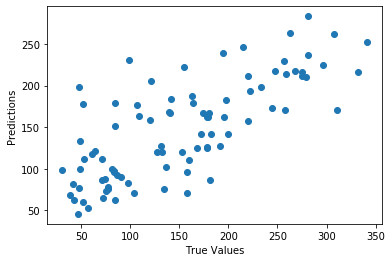

In [10]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [11]:
import numpy as np
print ('Test RMSE:', np.sqrt(mean_squared_error(predictions, y_test)))
print ('Train RMSE:', np.sqrt(mean_squared_error(lm.predict(X_train), y_train)))

Test RMSE: 54.5810435737431
Train RMSE: 53.32811488871186


# Cross Validation

In [12]:
import numpy as np
from sklearn.model_selection import KFold # import KFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]]) # create an array
y = np.array([5, 6, 7, 8]) # Create another array
kf = KFold(n_splits=2) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
print(kf.get_n_splits(X))

2


In [13]:
print(kf) 

KFold(n_splits=2, random_state=None, shuffle=False)


In [14]:
for train_index, test_index in kf.split(X):
    print('TRAIN:', train_index, 'TEST:', test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = lm.fit(X_train, y_train)
    predictions = lm.predict(X_test)
    print( "smse", np.sqrt(mean_squared_error(y_test,predictions)))

TRAIN: [2 3] TEST: [0 1]
smse 2.0
TRAIN: [0 1] TEST: [2 3]
smse 2.0


In [15]:
print(X_train)
print(X_test)

[[1 2]
 [3 4]]
[[1 2]
 [3 4]]


In [16]:
y_train, y_test

(array([5, 6]), array([7, 8]))

In [17]:
print(X_train)
print(y_train)

[[1 2]
 [3 4]]
[5 6]


In [18]:
print(X_test)
print(y_test)

[[1 2]
 [3 4]]
[7 8]


In [19]:
predictions = lm.predict(X_test)
predictions

array([5., 6.])

In [20]:
np.sqrt(mean_squared_error(y_test,predictions))

2.0

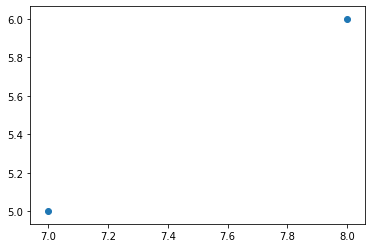

In [21]:
plt.scatter(y_test,predictions)

### LOOCV

TRAIN: [1 2 3] TEST: [0]
[3.]
smse 2.0
[[3 4]
 [1 2]
 [3 4]] [2 3 4]
[[1 2]] [1]
TRAIN: [0 2 3] TEST: [1]
[4.]
smse 2.0
[[1 2]
 [1 2]
 [3 4]] [1 3 4]
[[3 4]] [2]
TRAIN: [0 1 3] TEST: [2]
[1.]
smse 2.0
[[1 2]
 [3 4]
 [3 4]] [1 2 4]
[[1 2]] [3]
TRAIN: [0 1 2] TEST: [3]
[2.]
smse 2.0
[[1 2]
 [3 4]
 [1 2]] [1 2 3]
[[3 4]] [4]


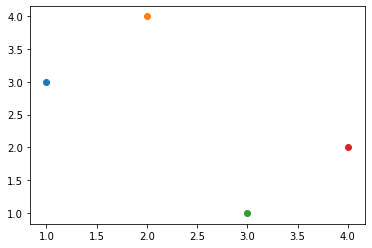

In [22]:
from sklearn.model_selection import LeaveOneOut 
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]]) # create an array
y = np.array([1, 2, 3, 4]) # Create another array
loo = LeaveOneOut()
loo.get_n_splits(X)


for train_index, test_index in loo.split(X):
    print('TRAIN:', train_index, 'TEST:', test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = lm.fit(X_train, y_train)
    predictions = lm.predict(X_test)
    print(predictions)
    print( "smse", np.sqrt(mean_squared_error(y_test,predictions)))
    plt.scatter(y_test,predictions)
    print(X_train,y_train)
    print(X_test,y_test)

In [23]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [ ]:
# Perform 6-fold cross validation
scores = cross_val_score(model, df, y, cv=6)
print ('Cross-validated scores:', scores)

In [ ]:
# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=10)
plt.scatter(y, predictions)

In [ ]:
print(np.sqrt(mean_squared_error(y,predictions)))

# tasks 

##### Find out cross validation results without using cross_val_predict

In [25]:
columns = 'age sex bmi map tc ldl hdl tch ltg glu'.split() # Declare the columns names
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
df = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
y = diabetes.target # define the target variable (dependent variable) as y
y[:5]

array([151.,  75., 141., 206., 135.])

In [27]:
import numpy as np
from sklearn.model_selection import KFold
kf = KFold(n_splits=10) # Define the split - into 10 folds 

for train_index, test_index in kf.split(df):
    print('TRAIN:', train_index, 'TEST:', test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model = lm.fit(X_train, y_train)
    predictions = lm.predict(X_test)
    
    print(np.sqrt(mean_squared_error(y_test,predictions)))
    plt.scatter(y_test,predictions)

TRAIN: [ 45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62
  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80
  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116
 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152
 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170
 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188
 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206
 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224
 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242
 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260
 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278
 279 280 281 282 283 284 285 286 287 288 289

IndexError: index 45 is out of bounds for axis 0 with size 4

In [256]:
type(y_test)

pandas.core.series.Series

In [28]:
type(X_test)

numpy.ndarray

##### Implement cross validation without using sklearn at all

In [ ]:
# your code here

# Feature Scaling

In [29]:
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
  
# Read Data from CSV 
data = pd.read_csv('regression.csv') 


y = data['Value']
data.head() 

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Position,Jersey Number,Contract Valid Until,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,€565K,RF,10.0,2021,5'7,159lbs
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,€405K,ST,7.0,2022,6'2,183lbs
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,€290K,LW,10.0,2022,5'9,150lbs
3,De Gea,27,Spain,91,93,Manchester United,72000000.0,€260K,GK,1.0,2020,6'4,168lbs
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,€355K,RCM,7.0,2023,5'11,154lbs


In [30]:
data1 = data.drop(['Name', 'Nationality', 'Club', 'Wage', 'Position', 'Weight', 'Height', 'Contract Valid Until', 'Value'], axis = 1)

In [31]:
data1

,Age,Overall,Potential,Jersey Number
0,31,94,94,10.0
1,33,94,94,7.0
2,26,92,93,10.0
3,27,91,93,1.0
4,27,91,92,7.0
...,...,...,...,...
17902,19,47,65,22.0
17903,19,47,63,21.0
17904,16,47,67,33.0
17905,17,47,66,34.0


In [32]:
trainX,testX,trainY,testY=train_test_split(data1,y,random_state=40,test_size=0.2)
len(trainX),len(trainY),len(testX),len(testY) 

(14325, 14325, 3582, 3582)

In [36]:
regr = linear_model.LinearRegression()

In [37]:
regr.fit(trainX,trainY)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
predy=regr.predict(testX)

In [226]:
print('Root mean squared error: %.2f'
      % np.sqrt(mean_squared_error(testY, predy)))

Root mean squared error: 3739061.66


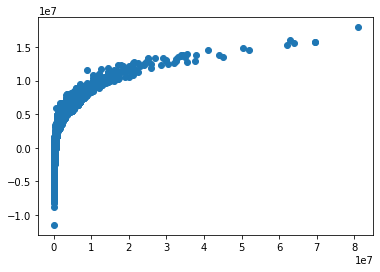

In [227]:
plt.scatter(testY,predy)

#### MinMaxScaler

In [198]:
import pandas as pd
import numpy as np
# Initialise the Scaler and Fit
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(X_train)

In [ ]:
pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))

In [ ]:
pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))

### Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Initialise the Scaler and Fit
norm = StandardScaler().fit(X_train)

In [ ]:
pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))

In [ ]:
pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))

# tasks

###### try applying this scalers to any dataset and check the regression results

In [39]:
dt=pd.read_csv('Ecommerce.csv')
dt

,Email,Address,Avatar,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872Lake Jamiefurt, U...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497West Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633South Chadburgh, TN...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808Brendachester, TX 0...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [40]:
dt.corr()

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


In [41]:
dt1=dt[["Avg Session Length","Time on App","Time on Website","Length of Membership","Yearly Amount Spent"]]
dt1

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620145
498,33.322501,12.391423,36.840086,2.336485,456.469510


In [42]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error
regr= linear_model.LinearRegression()# Create linear regression object
target=dt1['Yearly Amount Spent']
X=dt1[dt1.columns.difference(['Yearly Amount Spent'])]
x_train,x_test,y_train,y_test=train_test_split(X,target, test_size=0.2, random_state=40)
len(x_train),len(y_train),len(x_test),len(y_test)

(400, 400, 100, 100)

In [43]:

regr.fit(x_train,y_train)
y_pred = regr.predict(x_test)


In [44]:
# The coefficients

print('Mean absolute error: %.2f'
      % mean_absolute_error(y_test, y_pred))

print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))

print('Root mean squared error: %.2f'
      % np.sqrt(mean_squared_error(y_test, y_pred)))

Mean absolute error: 8.58
Mean squared error: 111.06
Root mean squared error: 10.54


In [45]:
#Using min max normalization
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(x_train)
dt2=pd.DataFrame(columns = x_train.columns, data = norm.transform(x_train))
dt2

,Avg Session Length,Length of Membership,Time on App,Time on Website
0,0.622736,0.147225,0.559888,0.690781
1,0.676077,0.316063,0.488395,0.331325
2,0.518723,0.886963,0.383220,0.265818
3,0.453356,0.608374,0.352782,0.573581
4,0.358719,0.579454,0.488436,0.446656
...,...,...,...,...
395,0.488548,0.560987,0.510576,0.425928
396,0.287936,0.582682,0.627018,0.575987
397,0.408243,0.712431,0.570338,0.523937
398,0.233787,0.781077,0.322077,0.228249


In [46]:
y_train

379    385.095007
433    434.144202
292    584.218313
450    475.015407
243    490.600443
          ...    
440    499.140152
165    513.450571
7      549.904146
219    496.933446
326    505.230068
Name: Yearly Amount Spent, Length: 400, dtype: float64

In [47]:
dt3=pd.DataFrame(columns = x_test.columns, data = norm.transform(x_test))
dt3

,Avg Session Length,Length of Membership,Time on App,Time on Website
0,0.635773,0.647679,0.589304,0.101474
1,0.393534,0.760817,0.369114,0.570904
2,0.413698,0.644019,0.418574,0.141928
3,0.231623,0.562488,0.697350,0.311646
4,0.591467,0.674832,0.594424,0.482243
...,...,...,...,...
95,0.695553,0.445605,0.615740,0.722001
96,0.775802,0.489391,0.580182,0.578015
97,0.496882,0.529231,0.462673,0.374749
98,0.559058,0.413218,0.776753,0.075087


In [48]:
y_test

167    578.986259
169    501.749233
461    502.771075
253    503.387887
42     591.197178
          ...    
54     522.404141
465    543.132626
310    479.614812
215    529.056663
381    547.190749
Name: Yearly Amount Spent, Length: 100, dtype: float64

In [49]:
regr.fit(dt2,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:

ypred = regr.predict(dt3)

 #The coefficients

print('Mean absolute error: %.2f'
      % mean_absolute_error(y_test, ypred))

print('Mean squared error: %.2f'
      % mean_squared_error(y_test, ypred))

print('Root mean squared error: %.2f'
      % np.sqrt(mean_squared_error(y_test, ypred)))

Mean absolute error: 8.58
Mean squared error: 111.06
Root mean squared error: 10.54


In [51]:
#Using StandardScaler
from sklearn.preprocessing import StandardScaler
# Initialise the Scaler and Fit
norm = StandardScaler().fit(x_train)
dtSS=pd.DataFrame(columns = x_train.columns, data = norm.transform(x_train))
dtSS

,Avg Session Length,Length of Membership,Time on App,Time on Website
0,0.990197,-2.433961,0.210575,1.211011
1,1.310995,-1.435328,-0.258767,-0.796901
2,0.364663,1.941406,-0.949230,-1.162826
3,-0.028455,0.293623,-1.149055,0.556334
4,-0.597612,0.122568,-0.258501,-0.152669
...,...,...,...,...
395,0.183189,0.013337,-0.113151,-0.268454
396,-1.023301,0.141657,0.651280,0.569771
397,-0.299771,0.909093,0.279177,0.279022
398,-1.348954,1.315117,-1.350626,-1.372684


In [52]:
y_train

379    385.095007
433    434.144202
292    584.218313
450    475.015407
243    490.600443
          ...    
440    499.140152
165    513.450571
7      549.904146
219    496.933446
326    505.230068
Name: Yearly Amount Spent, Length: 400, dtype: float64

In [53]:
dtss=pd.DataFrame(columns = x_test.columns, data = norm.transform(x_test))
dtss

,Avg Session Length,Length of Membership,Time on App,Time on Website
0,1.068601,0.526098,0.403689,-2.080848
1,-0.388227,1.195283,-1.041838,0.541381
2,-0.266962,0.504454,-0.717140,-1.854873
3,-1.361966,0.022219,1.113001,-0.906828
4,0.802148,0.686704,0.437303,0.046120
...,...,...,...,...
95,1.428121,-0.669116,0.577237,1.385408
96,1.910743,-0.410133,0.343806,0.581104
97,0.233309,-0.174493,-0.427629,-0.554337
98,0.607237,-0.860678,1.634269,-2.228243


In [54]:
regr.fit(dtSS,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
ypredss=regr.predict(dtss)

In [56]:
#The coefficients

print('Mean absolute error: %.2f'
      % mean_absolute_error(y_test, ypredss))

print('Mean squared error: %.2f'
      % mean_squared_error(y_test, ypredss))

print('Root mean squared error: %.2f'
      % np.sqrt(mean_squared_error(y_test, ypredss)))

Mean absolute error: 8.58
Mean squared error: 111.06
Root mean squared error: 10.54


### before Scaler 
Mean absolute error: 8.58
Mean squared error: 111.06
Root mean squared error: 10.54
                                       
### after MInMaxScaler
Mean absolute error: 8.58
Mean squared error: 111.06
Root mean squared error: 10.54
### after StandardScaler
Mean absolute error: 8.58
Mean squared error: 111.06
Root mean squared error: 10.54


# One Hot Encoding

In [57]:
data = pd.read_csv('regression.csv')
data

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Position,Jersey Number,Contract Valid Until,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,€565K,RF,10.0,2021,5'7,159lbs
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,€405K,ST,7.0,2022,6'2,183lbs
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,€290K,LW,10.0,2022,5'9,150lbs
3,De Gea,27,Spain,91,93,Manchester United,72000000.0,€260K,GK,1.0,2020,6'4,168lbs
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,€355K,RCM,7.0,2023,5'11,154lbs
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17902,J. Lundstram,19,England,47,65,Crewe Alexandra,60000.0,€1K,CM,22.0,2019,5'9,134lbs
17903,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,60000.0,€1K,ST,21.0,2020,6'3,170lbs
17904,B. Worman,16,England,47,67,Cambridge United,60000.0,€1K,ST,33.0,2021,5'8,148lbs
17905,D. Walker-Rice,17,England,47,66,Tranmere Rovers,60000.0,€1K,RW,34.0,2019,5'10,154lbs


In [58]:
data1 = data.drop(['Name', 'Nationality', 'Club', 'Wage', 'Position', 'Weight', 'Height', 'Contract Valid Until', 'Value'], axis = 1)

In [59]:
data1

,Age,Overall,Potential,Jersey Number
0,31,94,94,10.0
1,33,94,94,7.0
2,26,92,93,10.0
3,27,91,93,1.0
4,27,91,92,7.0
...,...,...,...,...
17902,19,47,65,22.0
17903,19,47,63,21.0
17904,16,47,67,33.0
17905,17,47,66,34.0


In [60]:
data2=pd.get_dummies(data[['Age','Club','Overall','Potential','Jersey Number']])

In [61]:
data2

,Age,Overall,Potential,Jersey Number,Club_ SSV Jahn Regensburg,Club_1. FC Heidenheim 1846,Club_1. FC Kaiserslautern,Club_1. FC Köln,Club_1. FC Magdeburg,Club_1. FC Nürnberg,...,Club_Wycombe Wanderers,Club_Yeni Malatyaspor,Club_Yeovil Town,Club_Yokohama F. Marinos,Club_Zagłębie Lubin,Club_Zagłębie Sosnowiec,Club_Çaykur Rizespor,Club_Örebro SK,Club_Östersunds FK,Club_Śląsk Wrocław
0,31,94,94,10.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,33,94,94,7.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26,92,93,10.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,27,91,93,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,27,91,92,7.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17902,19,47,65,22.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17903,19,47,63,21.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17904,16,47,67,33.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17905,17,47,66,34.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
target1=data['Value']
target1

0        110500000.0
1         77000000.0
2        118500000.0
3         72000000.0
4        102000000.0
            ...     
17902        60000.0
17903        60000.0
17904        60000.0
17905        60000.0
17906        60000.0
Name: Value, Length: 17907, dtype: float64

# tasks

###### try applying this scalers to any column(s) and check the regression results

In [70]:
xtrain,xtest,ytrain,ytest=train_test_split(data2,target1, test_size=0.2, random_state=40)
ytest

3943     2500000.0
14261     290000.0
9920      130000.0
4815     1200000.0
4928     1600000.0
           ...    
7211      950000.0
12531     350000.0
3055     5000000.0
6475     1100000.0
6818      975000.0
Name: Value, Length: 3582, dtype: float64

In [71]:
regr.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [72]:
ypred=regr.predict(xtest)

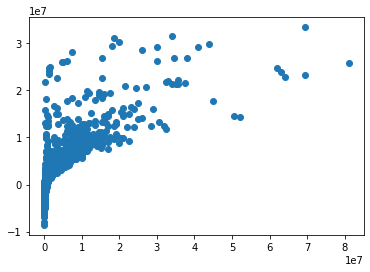

In [73]:
plt.scatter(ytest,ypred)

In [74]:
print('Root mean squared error: %.2f'
      % np.sqrt(mean_squared_error(ytest, ypred)))

Root mean squared error: 3371003.68


## before 'Club' added 
Root mean squared error: 3739061.66
## after 
 Root mean squared error:3371003.68